In [43]:
#Regression 1 assignment
#Created by Arham Khan
#CS 200 ST Machine Learning

# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
import math
from sklearn.metrics import mean_squared_error

In [3]:
#First task
# Loading data
dataset = pd.read_csv("testScores.csv")
dataset

,Hours Studied,Assignments Completed,Lecture Attended,Questions Asked,Readbacks Completed,Skillset,Test Score
0,8,4,6,2,3,Python,92
1,6,5,8,3,4,R,88
2,9,6,7,4,2,SQL,95
3,7,5,9,3,2,Java,87
4,6,4,7,2,2,Python,84
5,9,6,8,3,2,R,95
6,7,4,6,2,1,SQL,89
7,6,3,8,1,3,Java,80
8,7,5,7,3,2,Python,90
9,8,6,8,4,2,R,92


In [ ]:
#Visualization for Hours Studied
plt.scatter(dataset.iloc[:,0], dataset.iloc[:,6], color = 'blue')
plt.title('Test Score Score vs Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Score')

In [ ]:
#Visualizing completed assignments
plt.scatter(dataset.iloc[:,1], dataset.iloc[:,6], color = 'blue')
plt.title('Test Score vs Assignments Completed')
plt.xlabel('Assignments Completed')
plt.ylabel('Score')

In [ ]:
#Visualizing lectures attended
plt.scatter(dataset.iloc[:,2], dataset.iloc[:,6], color = 'red')
plt.title('Test Score vs Lectures Attended')
plt.xlabel('Lectures Attended')
plt.ylabel('Score')

In [ ]:
#Visualizing questions asked
plt.scatter(dataset.iloc[:,3], dataset.iloc[:,6], color = 'blue')
plt.title('Test Score vs Questions Asked')
plt.xlabel('Questions Asked')
plt.ylabel('Score')

In [ ]:
#Visualizing readbacks completed
plt.scatter(dataset.iloc[:,4], dataset.iloc[:,6], color = 'blue')
plt.title('Test Score vs Readbacks Completed')
plt.xlabel('Readbacks Completed')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

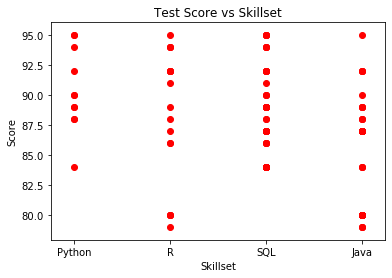

In [4]:
#Visualization for skillset Completed
plt.scatter(dataset.iloc[:,5], dataset.iloc[:,6], color = 'blue')
plt.title('Test Score vs Skillset')
plt.xlabel('Skillset')
plt.ylabel('Score')

In [5]:
#Second task
# Splitting the data into training and testing datasets 
# (80% training data, 20% testing data) 80/20 split, random state set to 0
x = dataset.iloc[:, :- 1].values
y = dataset.iloc[:, 6].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 1/5, random_state = 0) 

In [ ]:
#Third task
#Pulling first element from list of x_test and x_train array

x_train_hrStudies = []
for sublist in x_train:
    x_train_hrStudies.append(sublist[0])
x_train_hrStudies = np.array(x_train_hrStudies).reshape(-1, 1)

x_test_hrStudies = []
for sublist in x_test:
    x_test_hrStudies.append(sublist[0])
x_test_hrStudies = np.array(x_test_hrStudies).reshape(-1, 1)


# Predicting test scores based on hours studied using simple linear regression
linear_regressor = LinearRegression()
linear_regressor.fit(x_train_hrStudies, y_train)
y_pred = linear_regressor.predict(x_test_hrStudies)

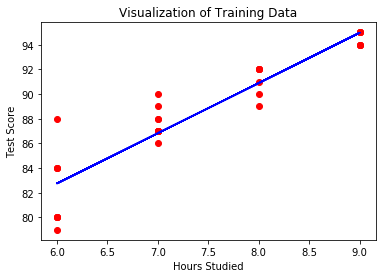

In [6]:
plt.scatter(x_train_hrStudies, y_train, color = 'blue')
plt.title('Visualization of Training Data')
plt.xlabel('Hours Studied')
plt.ylabel('Test Score')
plt.plot(x_train_hrStudies, linear_regressor.predict(x_train_hrStudies), color = 'red')

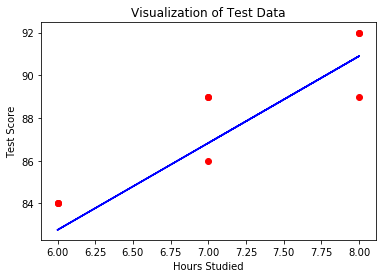

In [7]:
# Visualising test set results
plt.scatter(x_test_hrStudies, y_test, color = 'blue')
plt.plot(x_test_hrStudies, linear_regressor.predict(x_test_hrStudies), color = 'red')
plt.title('Visualization of Test Data')
plt.xlabel('Hours Studied')
plt.ylabel('Test Score')
plt.show()

In [8]:
# Model evaluation and running results via MAE
print(metrics.mean_absolute_error(y_test, y_pred))

# Model evaluation and running results via MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Model evaluation and running results via RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.444144953578918
2.3080147509342
1.5192151759820596


In [27]:
#Fourth Task
# Encoding categorical data and MLR implementation
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 6].values

labelEncoder_dataset = LabelEncoder()
X[:,5] = labelEncoder_dataset.fit_transform(X[:,5])

ct = ColumnTransformer([("Skillset", OneHotEncoder(), [5])], remainder = 'passthrough')
X = ct.fit_transform(X)


# Dummy Variable Trap!!
X = X[:, 1:]

In [36]:
#Fifth Task
#Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size= 1/5, random_state = 0)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predicting results from Test dataset
y_pred = linear_regressor.predict(X_test)

In [29]:
# Model evaluation and running results via MAE
print(metrics.mean_absolute_error(y_test, y_pred))

# Model evaluation and running results via MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Model evaluation and running results via RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3098181828193607
2.57920410580577
1.6059900702699783


In [30]:
#Sixth Task
X_train_constant = sm.add_constant(X_train)
X_train_constant = X_train_constant.astype(float)
y_train = y_train.astype(float)
model = sm.OLS(y_train, X_train_constant).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     90.32
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           5.43e-17
Time:                        20:35:36   Log-Likelihood:                -45.856
No. Observations:                  35   AIC:                             109.7
Df Residuals:                      26   BIC:                             123.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.3545      5.192     13.165      0.0

In [47]:
# Looping and removing variables with highest p-value, making sure all are significant
# Adding constant to the design matrix
X_train_constant = sm.add_constant(X_train)
X_train_constant = X_train_constant.astype(float)
X_test_constant = sm.add_constant(X_test)
X_test_constant = X_test_constant.astype(float)
y_train = y_train.astype(float)
cutoff = .05
# Storing p-values in a list
pvals = []
while True:
    # Fiting linear regression model and getting summary
    model = sm.OLS(y_train, X_train_constant).fit()
    pvals = model.pvalues[1:]

    # Fetching index of the highest p-value above cutoff (significance level)
    max_pval_index = np.argmax(pvals)
    if pvals[max_pval_index] < cutoff:
        break

    # Removing the variable with the highest p-value
    X_train_constant = np.delete(X_train_constant, max_pval_index + 1, axis=1)

# getting final model with only significant variables
model_final = sm.OLS(y_train, X_train_constant).fit()
print(model_final.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     176.1
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           2.26e-20
Time:                        20:53:26   Log-Likelihood:                -48.692
No. Observations:                  35   AIC:                             107.4
Df Residuals:                      30   BIC:                             115.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.2890      2.507     28.437      0.0

In [52]:
# Errors
#Create an MSE value
y_pred = model_final.predict(X_train_constant)
mse = mean_squared_error(y_train,y_pred)

print(mse)
#print(X_train_constant)
#print(X_train)

0.9460344708446773
[[1. 0. 6. 3. 8.]
 [1. 1. 9. 6. 9.]
 [1. 0. 7. 5. 7.]
 [1. 1. 9. 6. 9.]
 [1. 0. 9. 6. 7.]
 [1. 0. 6. 3. 8.]
 [1. 0. 7. 4. 6.]
 [1. 0. 6. 3. 8.]
 [1. 0. 6. 4. 7.]
 [1. 0. 8. 4. 7.]
 [1. 0. 8. 4. 7.]
 [1. 0. 7. 5. 7.]
 [1. 1. 8. 5. 9.]
 [1. 1. 9. 6. 8.]
 [1. 1. 9. 6. 8.]
 [1. 0. 7. 5. 7.]
 [1. 0. 7. 4. 6.]
 [1. 0. 7. 5. 8.]
 [1. 0. 6. 3. 8.]
 [1. 0. 6. 4. 7.]
 [1. 1. 6. 5. 8.]
 [1. 0. 6. 4. 7.]
 [1. 0. 9. 6. 7.]
 [1. 1. 8. 6. 9.]
 [1. 0. 9. 6. 7.]
 [1. 0. 7. 4. 6.]
 [1. 0. 7. 5. 8.]
 [1. 0. 9. 6. 7.]
 [1. 1. 8. 6. 9.]
 [1. 0. 6. 3. 8.]
 [1. 1. 8. 6. 8.]
 [1. 0. 7. 5. 8.]
 [1. 0. 7. 4. 6.]
 [1. 0. 7. 5. 9.]
 [1. 0. 8. 4. 6.]]
[[0.0 0.0 0.0 6 3 8 1 3]
 [0.0 1.0 0.0 9 6 9 4 2]
 [1.0 0.0 0.0 7 5 7 3 2]
 [0.0 1.0 0.0 9 6 9 4 2]
 [0.0 0.0 1.0 9 6 7 4 2]
 [0.0 0.0 0.0 6 3 8 1 3]
 [0.0 0.0 1.0 7 4 6 2 3]
 [0.0 0.0 0.0 6 3 8 1 3]
 [0.0 0.0 1.0 6 4 7 2 2]
 [1.0 0.0 0.0 8 4 7 2 2]
 [1.0 0.0 0.0 8 4 7 2 2]
 [1.0 0.0 0.0 7 5 7 3 2]
 [0.0 1.0 0.0 8 5 9 3 2]
 [0.0 1.0 0.0 9 6 8 3 2]


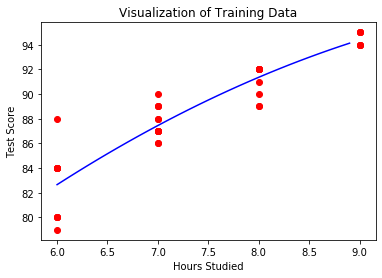

2.6907831716210384


In [66]:
#Seventh Task

# Creating a Polynomial Regressor
X = dataset.iloc[:, 0].values
X = X.reshape(-1, 1)
Y = dataset.iloc[:, 6].values

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

# Training the Polynomial Regression model using the entire dataset
from sklearn.linear_model import LinearRegression
Poly_reg_model = LinearRegression()
Poly_reg_model.fit(X_poly, Y)

# Visualizing Training set results
plt.scatter(X, Y, color='blue')
plt.title('Visualization of Training Data')
plt.xlabel('Hours Studied')
plt.ylabel('Test Score')

# Plotting best fit line from 2nd degree polynomial
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(-1, 1)
plt.plot(X_grid, Poly_reg_model.predict(poly_reg.fit_transform(X_grid)), color='red')
plt.show()

y_pred = Poly_reg_model.predict(X_poly)
mse = mean_squared_error(Y,y_pred)
print(mse)

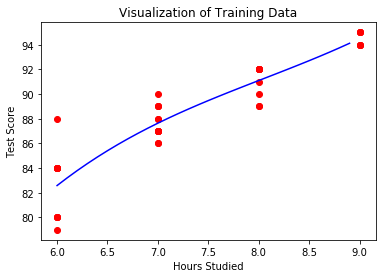

2.659794372294372


In [70]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)

# Training the Polynomial Regression model using the entire dataset
Poly_reg_model = LinearRegression()
Poly_reg_model.fit(X_poly, Y)

# Visualizing the training set results
plt.scatter(X, Y, color='red')
plt.title('Visualization of Training Data')
plt.xlabel('Hours Studied')
plt.ylabel('Test Score')

# Plotting best fit line for 2nd degree polynomial
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(-1, 1)
plt.plot(X_grid, Poly_reg_model.predict(poly_reg.fit_transform(X_grid)), color='red')
plt.show()

y_pred = Poly_reg_model.predict(X_poly)
mse = mean_squared_error(Y,y_pred)
print(mse)